# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML dicoding/machine learning untuk pemula/submission/Dataset_klasifikasi.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,65+,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,65+,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,18-25,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,26-35,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,26-35,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pilih 5 fitur campuran numerik & kategorikal
selected_features = ['TransactionAmount', 'LoginAttempts', 'TransactionType', 'Channel', 'CustomerAge']

In [5]:
# Pisahkan X dan y (target)
X = df[selected_features]
y = df['Cluster']

In [6]:
# One-hot encoding untuk fitur kategorikal
X = pd.get_dummies(X, columns=['TransactionType', 'Channel'], drop_first=True)

# Scaling fitur numerik
scaler = StandardScaler()
X[['TransactionAmount', 'LoginAttempts', 'CustomerAge']] = scaler.fit_transform(X[['TransactionAmount', 'LoginAttempts', 'CustomerAge']])

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<ipython-input-8-69a334a850f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


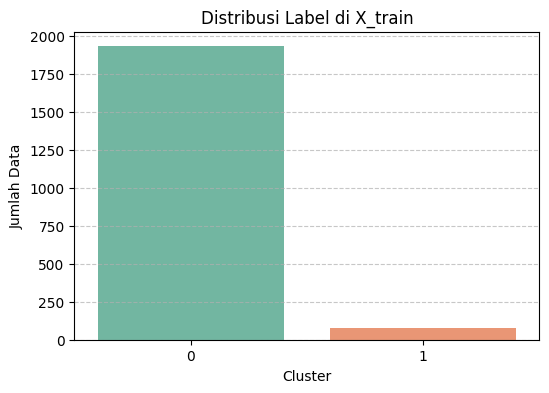

In [8]:
# Visualisasi distribusi label pada X_train
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Distribusi Label di X_train')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
# Terapkan SMOTE pada data training saja
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi setelah SMOTE
print(y_train_smote.value_counts())

Cluster
0    1933
1    1933
Name: count, dtype: int64


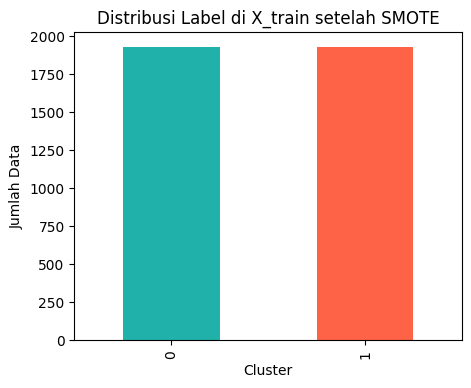

In [15]:
# Visualisasi distribusi label setelah SMOTE
plt.figure(figsize=(5,4))
y_train_smote.value_counts().plot(kind='bar', color=['lightseagreen', 'tomato'])
plt.title("Distribusi Label di X_train setelah SMOTE")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()

In [10]:
# Model 1 - Logistic Regression
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=42)

In [11]:
# Model 2 - Random Forest
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [16]:
# evaluasi Logistic regression
y_pred_log_smote = log_reg_smote.predict(X_test)
print("\nLogistic Regression (SMOTE) - Accuracy:", accuracy_score(y_test, y_pred_log_smote))
print("F1-Score:", f1_score(y_test, y_pred_log_smote))
print("\nClassification Report Logistic Regresion:\n", classification_report(y_test, y_pred_log_smote))
print("="*40)

# evaluasi Random Forest
y_pred_rf_smote = rf_smote.predict(X_test)
print("\nRandom Forest (SMOTE) - Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("F1-Score:", f1_score(y_test, y_pred_rf_smote))
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf_smote))


Logistic Regression (SMOTE) - Accuracy: 1.0
F1-Score: 1.0

Classification Report Logistic Regresion:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       1.00      1.00      1.00        19

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


Random Forest (SMOTE) - Accuracy: 1.0
F1-Score: 1.0

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       1.00      1.00      1.00        19

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [20]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [14]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Berdasarkan hasil evaluasi dua algoritma klasifikasi yaitu Logistic Regression dan Random Forest, didapatkan hasil akurasi dan F1-Score sebesar 100% pada testing set.

Kelebihan Model:
*   Baik Logistic Regression maupun Random Forest berhasil mencapai akurasi dan F1-Score sempurna (1.0) pada data testing.
*   Precision dan Recall untuk kedua kelas (0 dan 1) berada di angka 1.00, yang menunjukkan bahwa model mampu memprediksi kedua kelas dengan sangat baik pada data uji.

Kelemahan Model:
* Distribusi label di test set sangat tidak seimbang, terutama untuk kelas 1 yang hanya memiliki 19 sampel. Ini bisa menyebabkan overestimation terhadap performa model karena prediksi benar pada sample yang relatif sedikit.
* Generalizability: Karena test set hanya mewakili sedikit sampel dari cluster minoritas (label 1), performa model mungkin tidak stabil saat dihadapkan dengan data yang lebih variatif atau data baru.

Rekomendasi Tindakan Lanjutan:
* Menguji model pada dataset baru atau unseen dataset untuk mengevaluasi apakah performa tetap stabil.
* Mencoba algoritma lain seperti XGBoost atau LightGBM yang memiliki kemampuan bawaan dalam menangani data imbalanced, meskipun saat ini hasil sudah cukup optimal.
* Melakukan cross-validation untuk memastikan performa model tetap konsisten di berbagai subset data.